In [1]:
#import libs

import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import torch
import torch.nn as nn
from torch.distributions.normal import Normal
import torch.multiprocessing as mp

import gymnasium as gym

device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)
plt.rcParams["figure.figsize"] = (10, 5)

cuda


In [2]:
#Khởi tạo môi trường

env_name = "HumanoidStandup-v4"
# Create and wrap the environment
env = gym.make(env_name)
wrapped_env = gym.wrappers.RecordEpisodeStatistics(env, 50)  # Records episode-reward

# Observation-space of HumanoidStandup-v4 (4)
obs_space_dims = env.observation_space.shape[0]
# Action-space of HumanoidStandup-v4 (1)
action_space_dims = env.action_space.shape[0]
rewards_over_seeds = []

In [3]:
#Tạo folder kết quả

import os
def mkdir(path): 
    if not os.path.exists(path):
        os.mkdir(path)

save_path = "./save"
env_path = f'{save_path}/{env_name}'
model_path = f'{save_path}/{env_name}/model'
demo_path = f'{save_path}/{env_name}/demo'

mkdir(save_path)
mkdir(env_path)
mkdir(model_path)
mkdir(demo_path)

In [5]:
# Import necessary libraries
from stable_baselines3 import A2C
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.evaluation import evaluate_policy

# Set the seed and other training parameters
seed_set = [1]
total_num_episodes = 100000  # Total number of episodes
evaluation_interval = 1000
learning_rate = 7e-4

# Initialize an empty list to store rewards over different seeds
rewards_over_seeds = []

for seed in seed_set:
    # Set the random seed for reproducibility
    np.random.seed(seed)
    torch.manual_seed(seed)

    # Initialize the SAC agent
    model = A2C("MlpPolicy", env, verbose=0, seed=seed, learning_rate=learning_rate)

    rewards = []

    for episode in range(0, total_num_episodes + 1, evaluation_interval):
        if episode > 0:
            # Continue training the agent
            model.learn(total_timesteps=evaluation_interval)

        # Evaluate the agent
        mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=10)
        print(f"Seed: {seed}, Episode: {episode}, Mean Reward: {mean_reward}, Std Reward: {std_reward}")
        rewards.append((episode, mean_reward))

        # Save the model
        model.save(f"{model_path}/{env_name}_a2c_seed_{seed}_episode_{episode}")

    rewards_over_seeds.append(rewards)

# Output the rewards for different seeds
print(rewards_over_seeds)


/home/admin/miniconda3/envs/tue.cm210908/lib/python3.11/site-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Seed: 1, Episode: 0, Mean Reward: 28813.07933578491, Std Reward: 28.562941611398102
Seed: 1, Episode: 1000, Mean Reward: 32550.688406944275, Std Reward: 1313.570441277917
Seed: 1, Episode: 2000, Mean Reward: 34955.85683345795, Std Reward: 1439.4404274269373
Seed: 1, Episode: 3000, Mean Reward: 40543.07435874939, Std Reward: 693.7289674738665
Seed: 1, Episode: 4000, Mean Reward: 41075.73657417297, Std Reward: 886.614931560551
Seed: 1, Episode: 5000, Mean Reward: 40351.71496753693, Std Reward: 583.9053333200709
Seed: 1, Episode: 6000, Mean Reward: 40602.71622886658, Std Reward: 381.24758362348524
Seed: 1, Episode: 7000, Mean Reward: 36982.9000995636, Std Reward: 3561.0163091787863
Seed: 1, Episode: 8000, Mean Reward: 38918.356877326965, Std Reward: 2216.497214793123
Seed: 1, Episode: 9000, Mean Reward: 42560.56134872437, Std Reward: 8322.397480297583
Seed: 1, Episode: 10000, Mean Reward: 39642.009289550784, Std Reward: 8160.481335970735
Seed: 1, Episode: 11000, Mean Reward: 46651.6346897

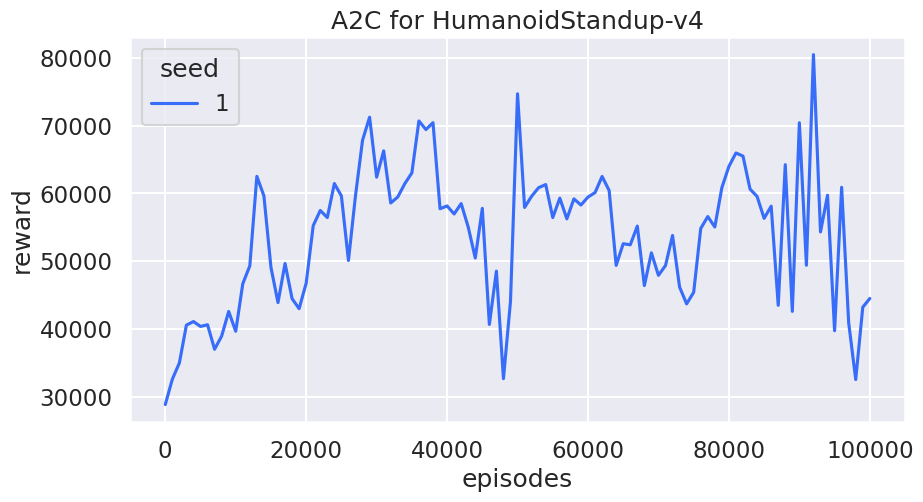

In [6]:
# ploting
rewards_to_plot = []
for seed_index, seed_rewards in enumerate(rewards_over_seeds):
    for episode, reward in seed_rewards:
        rewards_to_plot.append([seed_set[seed_index], episode, reward])
 
df1 = pd.DataFrame(rewards_to_plot, columns=["seed", "episodes", "reward"])
 
# Visualize the rewards
sns.set(style="darkgrid", context="talk", palette="rainbow")
sns.lineplot(x="episodes", y="reward", hue="seed", data=df1).set(
    title="A2C for HumanoidStandup-v4"
)
plt.show()